## Pandas Data.Frames

In [1]:
import numpy as np
import pandas as pd
import math
pd.set_option('display.max_columns', None)

Now, lets make a data frame with first making a list for each variable.

In [ ]:
cities=["Delhi","Mumbai","Kolkata","Chennai"]
code = [11,22,33,44]

mydata=list(zip(cities,code))

zip combines corresponding elements of an iterable into 
tuples

In [ ]:
mydata

now lets convert this to a pandas data frame which comes with lot of useful and intuitive properties which makes our job easy when working with dataframes in general. If you have worked with R before, then you'd notice that pandas dataframes works very similar to R's data frames.

In [ ]:
df = pd.DataFrame(data=mydata,columns=["cities","codes"])
df

In [ ]:
type(df)

In [ ]:
df = pd.DataFrame({"cities":cities,"code":code})
df

to write a data frame to csv file , you can use function to_csv. In the function you need to set option index=False in order to avoid writing rownumbers to csv file and header=True , in order to write variables names in the first row of the csv file.

if you simply provide the file name, it will be written to where your .ipynb/.py file is. In case you want to write the file to a specific location then you'd need to mention the file name with complete path.

In [ ]:
df.to_csv("mydata2.csv",index=False,header=False)
#df.to_csv("data/mydata.csv")

You can use function ExcelWriter to creater a writer object for an excel file. and then use function to_excel with data frame to write data to excel file. Here is an example

In [ ]:
writer=pd.ExcelWriter("mydata.xlsx")

df.to_excel(writer,"Sheet1",index=False)
df.to_excel(writer,"Sheet2")

In [ ]:
file='../data/loans data.csv'
ld=pd.read_csv(file)

using function `head` you can lok at first few observations in the data which gives an idea about whether data was imported properly to python or not.

In [ ]:
ld.head(10)

to get column names we can look attribute column of the data

In [ ]:
len(ld.columns)

In [ ]:
ld.columns

to see type of these columns we can use attribute dtypes

In [ ]:
ld.dtypes

flost64 here correponds to numeric values and object corresponds to categorical columns

to know how many rows and columns are their in the data we can use attribute shape

In [ ]:
ld.shape

this tells us that the data has 2500 rows/observations and 15 columns in it

## Indexing/ Subsetting

 - iloc
 - loc
 - ix <br>
 
`loc` gets rows (or columns) with particular labels from the index. `iloc` gets rows (or columns) at particular positions in the index (so it only takes integers). `ix` usually tries to behave like `loc` but falls back to behaving like `iloc` if a label is not present in the index.

now lets subset this data on the basis of row and column numbers , keep in mind that count start with 0 for both 

In [ ]:
ld1=ld.iloc[3:7,1:5]
ld1

iloc here correponds to subsetting by position , to understand this better lets try to further subset this data

In [ ]:
ld1.iloc[2:4,1:3]

as you can see here the position is relative to current data , not the original one

Generally however we do not subset data by positions , we subset by either conditions or column names , if we are subsetting just on the basis of conditions or just column names we can directly pass those in square brackets

In [ ]:
ld.head(2)

In [ ]:
ld["Home.Ownership"].unique()

In [ ]:
condition = (ld['Home.Ownership']=='MORTGAGE') & (ld['Monthly.Income']>5000)

In [ ]:
ld[condition].head(3)

In [ ]:
desired_cols = ['Home.Ownership','Monthly.Income']

In [ ]:
result = ld.loc[condition,desired_cols]
result.shape

in order to negate a condition or drop rows on the basis of a conditon , we just need to add a ~ symbol in front of the condition 

In [ ]:
ld[~(condition)].shape

In [ ]:
1814+686

in order to drop columns on the basis of names we can make use of the inbuilt drop function

In [ ]:
len(ld.columns)

In [ ]:
c = ld.drop(['Home.Ownership','Monthly.Income'],axis=1)

if you scroll through the output you will find that those columns are no more in the data, this however doesnt modify the original data , these columns are still present in the data

In [ ]:
len(ld.columns)

In [ ]:
len(c.columns)

In [ ]:
#ld=ld.drop(['Home.Ownership','Monthly.Income'],axis=1)

In [ ]:
len(ld.columns)

In [ ]:
ld.drop(['Debt.To.Income.Ratio', 'State'],axis=1,inplace=True)

In [ ]:
len(ld.columns)

this changes the data inplace 

In [ ]:
del ld['Employment.Length']

In [ ]:
len(ld.columns)

## Numerical Analysis

To read from a csv file, we'll be using function read_csv. we can create a separate string first with complete path name and then use it in the function or anywhere else.

In [ ]:
myfile='../data/bank-full.csv'
bd=pd.read_csv(myfile,sep=";")

In [ ]:
bd.shape

In [ ]:
bd.head(10)

In [ ]:
bd.columns

attribute dtype contains information regarding data type for all the columns

In [ ]:
bd.dtypes

dtype object refers to categorical variables for columns. You can check dtype for individual columns as follows :

In [ ]:
#bd["month"].dtype

Function describe quickly prepares summary for numeric columns in the data.

In [ ]:
#bd.describe()

In [ ]:
bd.nunique()

In [ ]:
bd["marital"].unique()

you can access specific summary statstic as well using respective functions. For example to find median of all numeric columns you do this :

In [ ]:
bd.median()

these describe and individual summary functions can be used with individual columns or subset of data too.

In [ ]:
bd["age"].describe()

In [ ]:
bd[["age","previous"]].describe()

The need for custom functions is minimal unless you have very specific requirements. The full range of basic statistics that are quickly calculable and built into the base Pandas package are:

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

For categorical variables, these kind of numeric summaries can not be calculated. As a summary we need to look at frequency of levels/categories of categorical variable. Which can be achieved through function value_counts(). This function doesn't work with a data frame.

In [ ]:
bd["job"].unique()

In [ ]:
bd["job"].value_counts()
## value_counts : does it count missing values 

In [ ]:
k = bd["job"].value_counts()
k

In [ ]:
k.values

In [ ]:
k.iloc[2:5]

In [ ]:
k.loc["services"]

In [ ]:
k.iloc[4]

You can use function select_dtypes for extracting a specific type of data columns from a dataframe as subset

In [ ]:
len(bd.columns)

In [ ]:
bd_cat_data=bd.select_dtypes(['object'])

In [ ]:
len(bd_cat_data.columns)

attribute columns contains all column names of a data.frame

In [ ]:
bd_cat_data.dtypes

In [ ]:
for c in bd_cat_data.columns:
    print(c)
    print(15*"***")
    print(bd[c].value_counts())
    print(15*"***")

In [ ]:
for c in bd_cat_data.columns:
    print(c,":",bd[c].nunique())

For cross frequency tables between two variables we can use function cross tab as follows

In [ ]:
pd.crosstab(bd["default"],bd["job"])

In [ ]:
pd.crosstab(bd["y"],bd["job"],margins=True)

you can make higher dimension crosstab as well with the same function. To look at summary of a numerical variable across category of some categorical variable . we can use groupby functionality for the same lets look at examples to understand this:

In [ ]:
bd["age"].mean()

In [ ]:
desired_cols = ["job","age"]
bd[desired_cols].head(5)

In [ ]:
bd.groupby('job')["age"].mean()

this gives us average age across different job categories . You can use any other statistical summary function given in the table discussed previously in this module

you can calculate multiple groupwise summary stats for different columns also. Lets look at example below:

In [ ]:
bd.groupby(['housing','loan'])["age","balance"].mean()

you can use function agg with grouped data to calculate different summary stats for different columns. Here is an example

In [ ]:
bd.groupby(['housing','loan']).agg({'age':'mean','duration':'max','balance':'sum'})

## Visual Data Analysis

Next we look at ways to visually summarise our data. Simple plot function for numeric columns, plots values along the observation numbers

In [72]:
myfile='../data/bank-full.csv'
bd=pd.read_csv(myfile,sep=";")

In [77]:
bd["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

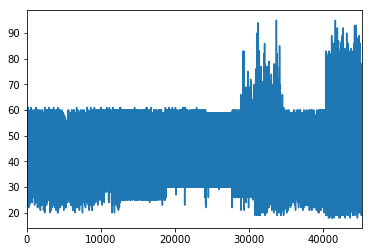

In [78]:
bd["age"].plot()

In [73]:
import seaborn as sns

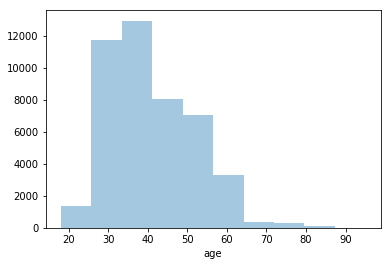

In [89]:
#density plot
sns.distplot(bd['age'], bins=10, kde=False) #histogram and density curve
# see what various values to these options do

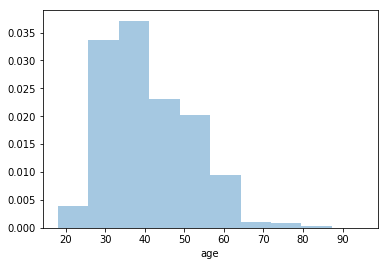

In [91]:
sns.distplot(bd['age'],kde=False,bins=10,hist=True, norm_hist=True)

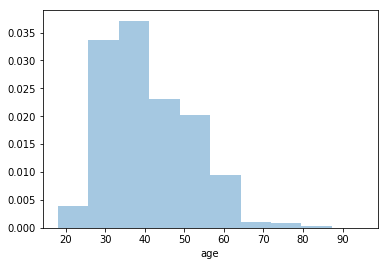

In [93]:
myplot=sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
myimg=myplot.get_figure()
myimg.savefig('output.png')

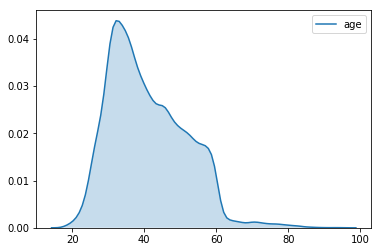

In [94]:
#sns.kdeplot(bd['pdays'],shade=True)
sns.kdeplot(bd['age'],shade=True)

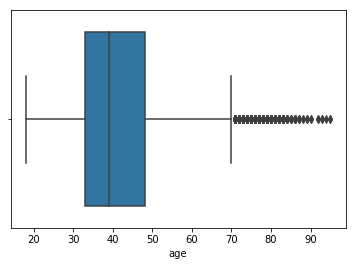

In [95]:
sns.boxplot(bd['age'])

## numeric-numeric

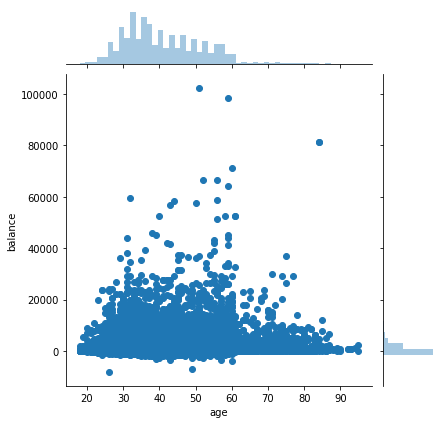

In [96]:
sns.jointplot(x="age", y="balance", data=bd)

/anaconda3/envs/forall/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


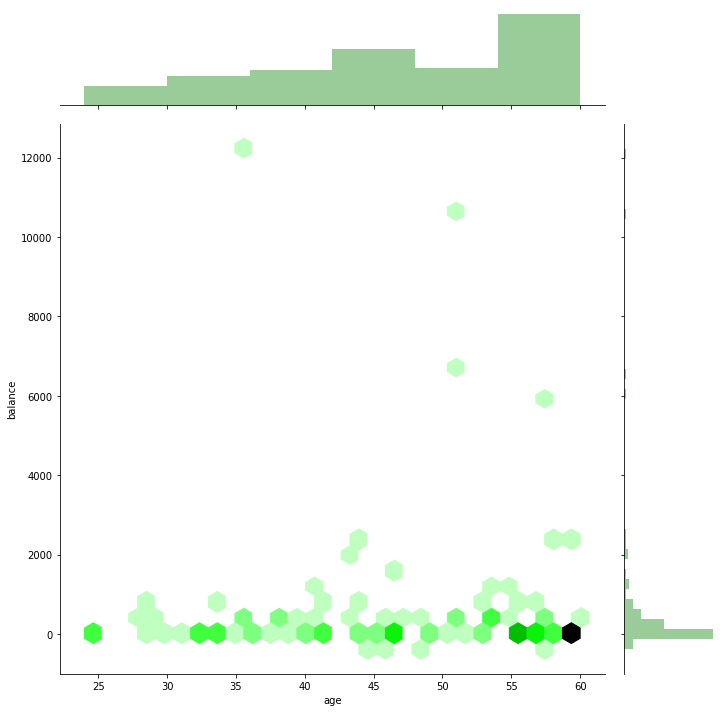

In [97]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:100,:],
              kind="hex",size=10,color="g")

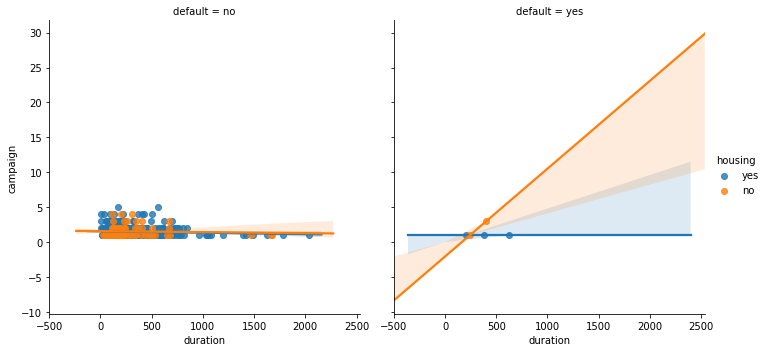

In [101]:
#linear model plot
sns.lmplot(x='duration', y='campaign', 
           data=bd.iloc[1:500,:],
          hue="housing",
          col="default")

## Categorical

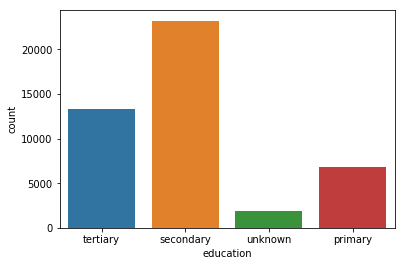

In [102]:
sns.countplot(x="education", data=bd)

# Heatmaps

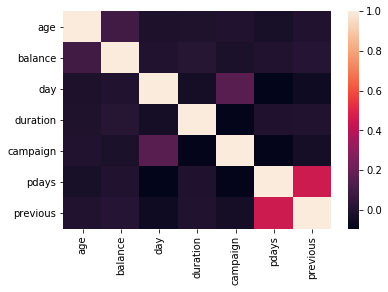

In [103]:
sns.heatmap(bd.corr())

# Modifying Data
- changing column type (astype, to_numeric)
- modifying existing columns
- adding new columns
- removing existing columns
- conditional variables

In [2]:
cities=["Delhi","Mumbai","Kolkata","Chennai"]
code = ["11","22","33","4a"]

df = pd.DataFrame({"cities":cities,"codes":code})
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,4a


In [3]:
df.dtypes

cities    object
codes     object
dtype: object

you can see here that variable code is of type categorical, because we supplied the numbers in quotes. All the values in that column are essentially numbers except "4a". We can force numeric type on that column and values which can be converted to numbers will be converted. and values like "4a" which can not be converted to numbers will be converted NaN instead.

<center><img src="../images/pd.df.astype.png" width="80%"/></center>

In [7]:
df["codes"]= df["codes"].astype("float", errors= "ignore")
df.dtypes

cities    object
codes     object
dtype: object

#### pandas.to_numeric(arg, errors='raise', downcast=None)

Convert argument to a numeric type.

Parameters:	
`arg :` list, tuple, 1-d array, or Series

`errors : {‘ignore’, ‘raise’, ‘coerce’}`, default ‘raise’
 - If ‘raise’, then invalid parsing will raise an exception
 - If ‘coerce’, then invalid parsing will be set as NaN
 - If ‘ignore’, then invalid parsing will return the input
 
`downcast : {‘integer’, ‘signed’, ‘unsigned’, ‘float’}` , default None

If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with), downcast that resulting data to the smallest numerical dtype possible according to the following rules:

‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8) <br>
‘unsigned’: smallest unsigned int dtype (min.: np.uint8) <br>
‘float’: smallest float dtype (min.: np.float32) <br>

As this behaviour is separate from the core conversion to numeric values, any errors raised during the downcasting will be surfaced regardless of the value of the ‘errors’ input.

In addition, downcasting will only occur if the size of the resulting data’s dtype is strictly larger than the dtype it is to be cast to, so if none of the dtypes checked satisfy that specification, no downcasting will be performed on the data.

In [8]:
# errors : {‘ignore’, ‘raise’, ‘coerce’},
df["codes2"]=pd.to_numeric(df["codes"], errors="coerce")
df.dtypes

cities     object
codes      object
codes2    float64
dtype: object

In [9]:
df

,cities,codes,codes2
0,Delhi,11,11.0
1,Mumbai,22,22.0
2,Kolkata,33,33.0
3,Chennai,4a,NaN


For creating a new column in the data , you can always create a list which can be attached to the data as couple of examples given below:

In [10]:
# modifying an existing column
df["cities"]=[x.replace("a","6") for x in df["cities"]]
df

,cities,codes,codes2
0,Delhi,11,11.0
1,Mumb6i,22,22.0
2,Kolk6t6,33,33.0
3,Chenn6i,4a,NaN


In [ ]:
# adding a new column using existing ones
df["code_log"]=[math.log(x) for x in df["codes"]]
df

In [ ]:
# you can use multiple columns too
df["new"]=df.codes+df.code_log
df["new2"]=df.new+2
df

### conditional variables

In [12]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [ ]:
#np.where(condition, value_if_True, value_if_False)

In [15]:
arr = np.where(df['Set']=='Z', 'green', 'red')

In [16]:
df['color'] = arr
df

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,red
3,C,Y,red


in function np.where, first argument is the condition which may or may not involve existing columns of the data, second arugument is the value which the new column will take when the condition in first argument is true . If the condition is not true , new column will take value from the third argument. 

In [17]:
df['abc'] = np.where(df['Set']=='Z', df['Type'], df['Set'])
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,red,X
3,C,Y,red,Y


As you can see , second and third arguments of the function np.where dont need to be constant values. They can be similar length lists as well coming from a dataframe or otherwise.

To drop columns you can either use their name or positions . Here are few examples:

In [18]:
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,red,X
3,C,Y,red,Y


In [19]:
df=df.drop("abc",axis=1) 
# to drop inplace , you can use option inplace as we see in the next exmaple
df

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,red
3,C,Y,red


In [20]:
df.drop("color",axis=1,inplace=True)
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [21]:
df.columns[0]

'Type'

In [22]:
df=df.drop(df.columns[0],axis=1)
df

,Set
0,Z
1,Z
2,X
3,Y


Notice that while using column positions , counting starts from 0.

Next we see how to drop observations from a data using both , row positions and conditions

In [23]:
df=df.drop([3],axis=0)
df

,Set
0,Z
1,Z
2,X


You can see that 4th row from the data has been deleted. Remebered that here also counting start at 0.Next we see subsetting data based a condition.

In [24]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [25]:
df=df[df["Type"]=="B"]
df

,Type,Set
1,B,Z
2,B,X


So for we have seen, how to select entire columns and process them. Many at times you might need to select entire rows or specific values in the columns. Here is how you do it. 

In [26]:
df.index

Int64Index([1, 2], dtype='int64')

Notice that the index is still from the original data, you can either update that or use the existing values.We'll update the index here.

In [27]:
df['col2']=[3,4]
df

/anaconda3/envs/forall/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Type,Set,col2
1,B,Z,3
2,B,X,4


In [28]:
df = df.reset_index(drop=True)
df

,Type,Set,col2
0,B,Z,3
1,B,X,4


In [29]:
# selecting a row
df.loc[1]

Type    B
Set     X
col2    4
Name: 1, dtype: object

In [30]:
# selecting a column
df.iloc[:,1]

0    Z
1    X
Name: Set, dtype: object

In [ ]:
# selecting a sprecific value with row,column names/indices
print(df.iloc[0,1])
print(df.iloc[0]['Type'])

### Intricate data cleaning

In [31]:
file='../data/loans data.csv'
ld=pd.read_csv(file)

In [32]:
ld['Interest.Rate'].head(5)

0     8.90%
1    12.12%
2    21.98%
3     9.99%
4    11.71%
Name: Interest.Rate, dtype: object

In [33]:
ld['FICO.Range'].head(5)

0    735-739
1    715-719
2    690-694
3    695-699
4    695-699
Name: FICO.Range, dtype: object

In [34]:
ld['Amount.Requested'].head(5)

0    20000
1    19200
2    35000
3    10000
4    12000
Name: Amount.Requested, dtype: object

 - The rstrip() method returns a copy of the string with trailing characters removed (based on the string argument passed)

In [35]:
new_rate=ld['Interest.Rate'].map(lambda x: float(x.rstrip('%')))
new_rate.head(5)

0     8.90
1    12.12
2    21.98
3     9.99
4    11.71
Name: Interest.Rate, dtype: float64

In [36]:
fico_lr=ld['FICO.Range'].map(lambda x: float(str(x[0:3])))
fico_lr.head(5)

0    735.0
1    715.0
2    690.0
3    695.0
4    695.0
Name: FICO.Range, dtype: float64

In [37]:
fico_ur=ld['FICO.Range'].map(lambda x: float(str(x[4:])))
fico_ur.head(5)

0    739.0
1    719.0
2    694.0
3    699.0
4    699.0
Name: FICO.Range, dtype: float64

In [41]:
loanamt_clean = pd.to_numeric( ld['Amount.Requested'], errors="coerce")

In [43]:
loanamt_clean.head(5)

0    20000.0
1    19200.0
2    35000.0
3    10000.0
4    12000.0
Name: Amount.Requested, dtype: float64

In [44]:
#swap the columns with column with clean data
#Note the column head doesn't change but only the data is replace
ld['Interest.Rate']=new_rate
ld['FICO.Range.LR']=fico_lr
ld['FICO.Range.UR']=fico_ur
ld['Amount.Requested'] = loanamt_clean

In [45]:
del ld['FICO.Range']

In [46]:
ld["Home.Ownership"]

0       MORTGAGE
1       MORTGAGE
2       MORTGAGE
3       MORTGAGE
4           RENT
5            OWN
6           RENT
7       MORTGAGE
8           RENT
9           RENT
10          RENT
11      MORTGAGE
12      MORTGAGE
13          RENT
14          RENT
15          RENT
16          RENT
17          RENT
18          RENT
19      MORTGAGE
20      MORTGAGE
21      MORTGAGE
22          RENT
23          RENT
24      MORTGAGE
25          RENT
26          RENT
27      MORTGAGE
28      MORTGAGE
29      MORTGAGE
          ...   
2470        RENT
2471    MORTGAGE
2472    MORTGAGE
2473    MORTGAGE
2474        RENT
2475        RENT
2476    MORTGAGE
2477    MORTGAGE
2478    MORTGAGE
2479    MORTGAGE
2480        RENT
2481    MORTGAGE
2482    MORTGAGE
2483    MORTGAGE
2484    MORTGAGE
2485    MORTGAGE
2486         OWN
2487        RENT
2488        RENT
2489        RENT
2490        RENT
2491        RENT
2492    MORTGAGE
2493    MORTGAGE
2494    MORTGAGE
2495    MORTGAGE
2496         OWN
2497    MORTGA

In [48]:
pd.get_dummies(ld["Home.Ownership"])

,MORTGAGE,NONE,OTHER,OWN,RENT
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


In [47]:
ld["Home.Ownership"].nunique()

5

# Merge & Concatenate
In this section we see how to combine two or more dataframes in various ways. Starting with simple vertical stacking:

In [49]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']}
                        )

In [50]:
df2 = pd.DataFrame({'A': ['A4', 'A1', 'A2', 'A3'],
                       'B': ['B4', 'B1', 'B2', 'B3'],
                        'C': ['C4', 'C1', 'C2', 'C3'],
                        'D': ['D4', 'D1', 'D2', 'D3']}
                        )


In [51]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [52]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


For simple stacking [vertical or horizontal], we'll be using function concat. By using axis option, you can either horizontally or vertically stack the data. Keep in mind that pandas data.frames can have duplicate column names, which can a be huge hassle later on. So when you are horizontally stacking two datasets, do check for that possibility.

In [53]:
#vertical stacking
newdata_long=pd.concat([df1,df2],axis=0)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [54]:
#reset index
newdata_long = newdata_long.reset_index(drop=True)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A1,B1,C1,D1
6,A2,B2,C2,D2
7,A3,B3,C3,D3


In [55]:
df3 = pd.DataFrame({'E': ['A4', 'A1', 'A2', 'A3',"ab"],
                       'F': ['B4', 'B1', 'B2', 'B3',"ab"],
                        'G': ['C4', 'C1', 'C2', 'C3',"ab"],
                        'H': ['D4', 'D1', 'D2', 'D3',"ab"]}
                        )
df3

,E,F,G,H
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,ab,ab,ab,ab


In [56]:
newdata_wide=pd.concat([df1,df3],axis=1)
newdata_wide

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A1,B1,C1,D1
2,A2,B2,C2,D2,A2,B2,C2,D2
3,A3,B3,C3,D3,A3,B3,C3,D3
4,NaN,NaN,NaN,NaN,ab,ab,ab,ab


Simple vertical and horizontal stacking at times doesnt work. You need to merge data by some keys . lets look how to do inner,outer,left,right joins using the function merge.

In [57]:
df1=pd.DataFrame({"custid":[1,2,3,4,5],
                 "product":["Radio","Radio","Fridge","Fridge","Phone"]})
df2=pd.DataFrame({"custid":[3,4,5,6,7],
                 "state":["UP","UP","UP","MH","MH"]})

In [58]:
df1

,custid,product
0,1,Radio
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [59]:
df2

,custid,state
0,3,UP
1,4,UP
2,5,UP
3,6,MH
4,7,MH


In [60]:
# inner join
inner=pd.merge(df1,df2,on=["custid"])
inner

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP


In [61]:
#outer join
outer=pd.merge(df1,df2,on=["custid"],how='outer')
outer

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP
5,6,NaN,MH
6,7,NaN,MH


In [62]:
#left join
left=pd.merge(df1,df2,on=["custid"],how='left')
left

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP


In [63]:
#right join
right=pd.merge(df1,df2,on=["custid"],how='right')
right

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP
3,6,NaN,MH
4,7,NaN,MH


### df.join()

The related DataFrame.join method, uses merge internally for the index-on-index and index-on-column(s) joins, **but joins on indexes by default** rather than trying to join on common columns (the default behavior for merge). If you are joining on index, you may wish to use DataFrame.join to save yourself some typing.

In [64]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [65]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [67]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [68]:
left.join(right, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [69]:
left.join(right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [70]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [71]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3
